# Simulated Annealing 

In [56]:
%matplotlib inline
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Excercise 1

In [57]:
#Code for the objective function
def value(x) :
    m = 1 + math.cos(0.04 * x) ** 2
    n = math.exp(-x ** 2 / (20000))
    return m * n

# Excercise 2

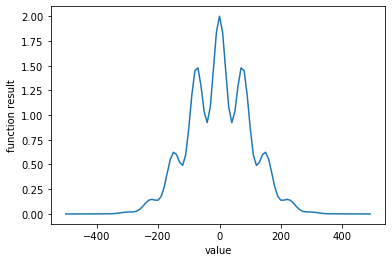

In [58]:
#Code for plotting the fittness surface
X = np.arange(-500, 500, 10)
Y = []
for i in X :
    Y.append(value(i))
plt.xlabel('value')
plt.ylabel('function result')

plt.plot(X, Y)


# Excercise 3

# Simulated Annealing Algorithm
1) Choose a random $X_{i}$, select the inital temp, and specify inital cooling.                                                                      
2) Evaluate E($X_{i}$) using a sulmulation model(objective function).          
3) Perturb $X_{i}$ to obtain a neighbor ($X_{i+1}$).                          
4) Evaluate E($X_{i+1}$) using a simulation model.                               
5) If E($X_{i+1}$) < E($X_{i}$), $X_{i+1}$ is the new current solution.            
6) If E($X_{i+1}$) > E($X_{i}$), then accept $X_{i+1}$ as the new current solution with a probability $e^{-\Delta / T}$ where $\Delta = E(X_{i+1}) - E(X_{i})$                                                                       
7) Reduce the system temperature according to the cooling schedule.          
8) Teminate the algorithm.

(250, -0.0744052119943583)     80


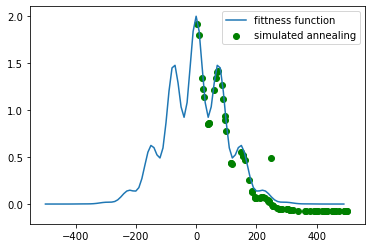

In [42]:
iteration = []
energy = []
def pertrubation_within_space() :
    return random.uniform(-1,1)
def pertrubation_within_temperature() :
    return random.uniform(-250,250)
def annealing_with_current_state(current_state, t, pertrubation) :
    next_state = current_state + pertrubation
    energy_delta = value(next_state) - value(current_state)
    if (energy_delta < 0) or (math.exp(-energy_delta / t) > np.random.random()) :
        current_state = next_state
    #print(current_state," ", next_state, "   ", energy_delta)
    iteration.append(current_state)
    energy.append(energy_delta)
    return current_state,energy_delta
        
#init_temp - initial temperature
#alpha - defines at which rate we should change our temp (cooling schedule)
#final_temp - final temperature
#init_state - inital state where we will start 
def simulated_annealing(init_temp, alpha, final_temp, init_state) : 
    t = init_temp
    current_state = init_state
    energy_delta = None
    while (t < final_temp) :
        result_state,energy_delta = annealing_with_current_state(current_state, t, pertrubation_within_temperature())
#         for i in range(1, 50) :
#             inside_result_state, energy_delta = annealing_with_current_state(result_state, t, pertrubation_within_space())
#             result_state = inside_result_state
        t = t + 1
    return current_state,energy_delta
print(simulated_annealing(10, 0.01, 90, 250), "   ", len(iteration))

plt.plot(X, Y, label='fittness function')
plt.scatter(iteration, energy, c = ['green'], label = 'simulated annealing')
plt.legend()
plt.show()


# Excercise 4

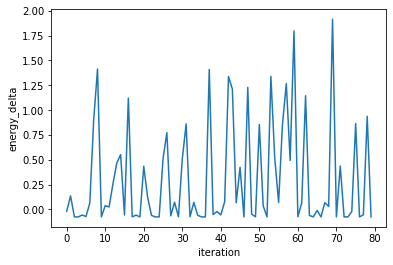

In [59]:
plt.plot(list(range(0,len(iteration))), energy)
plt.xlabel('iteration')
plt.ylabel('energy_delta')
plt.show()